In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

<function Bunch.keys>

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

70,000개 이미지와 784개의 특성이 있다. 이미지가 28x28 픽셀이기 때문이다.<br>
개개의 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다.

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [35]:
some_digit = X[0]

KeyError: ignored

In [28]:
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plot.show()

KeyError: ignored

In [15]:
y[0]

'5'

In [18]:
import numpy as np
y = y.astype(np.uint8)

In [19]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

##3.2 이진 분류기 훈련

In [21]:
y_train_5 = (y_train == 5)  #5는 true이고, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

In [22]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

SGDClassifier(확률적 경사 하강법) 모델을 만들고 전체 훈련 세트를 사용해 훈련시켜보겠습니다.

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([some_digit])

NameError: ignored

##3.3 성능 측정

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

In [40]:
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone (sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

KeyError: ignored

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring = 'accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [42]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y = None):
        return self
    def predict(self, X):
        return np.zeros((len(x),1),dtype=bool)

In [43]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "<ipython-input-42-d5053e58444d>", line 7, in predict
    return np.zeros((len(x),1),dtype=bool)
NameError: name 'x' is not defined


array([nan, nan, nan])

###3.3.2 오차 행렬

In [44]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

오차 행령의 행 : 실제 클래스<br>
오차 행렬의 열 : 예측한 클래스<br>
첫번째 행은 '5 아님' 이미지(음성 클래스), 두번째 행은 '5' 이미지(양성 클래스)

In [46]:
y_train_perfect_predictions = y_train_5   #완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])



*   정밀도(precision) = TP /(TP + FP)
*   재현율(recall) = TP /(TP + FN) = 민감도(sensitivity), 진짜 양성 비율(true positive rate)



###3.3.3 정밀도와 재현율

In [47]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)   # = 3530/ ( 687 + 3530)

0.8370879772350012

In [49]:
3530/ ( 687 + 3530)

0.8370879772350012

In [50]:
recall_score(y_train_5, y_train_pred)  # = 3530 / ( 1891 + 3530)

0.6511713705958311

In [51]:
3530 / ( 1891 + 3530)

0.6511713705958311

F1 점수 : 정밀도와 재현율의 조화 평균<br>
2*(정밀도 x 재현율) / ( 정밀도 + 재현율)

In [52]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

###3.3.4 정밀도/재현율 트레이드오프

SGDClassifier 가 분류를 어떻게 결정하는지 살펴보자<br>
결정 함수(decision function)를 사용하여 각 샘플의 점수를 계산한다.  
이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당한다.  
***임곗값을 내리면 재현율이 높아지고 정밀도가 줄어든다.***



*   decision_function() : 각 예측에 사용한 샘플의 점수를 확인할 수 있다.




In [53]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

NameError: ignored

In [54]:
threshold= 0 
y_some_digit_pred = (y_scores > threshold)

NameError: ignored

In [55]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

NameError: ignored

그렇다면 적절한 임곗값을 어떻게 정할 수 있을까?  

*   cross_val_predict() : 훈련 세트에 있는 모든 샘플의 점수를 구해야 한다. 예측 결과가 아니라 결정 점수를 반환받도록 지정해야 한다.




In [57]:
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv = 3, method='decision_function')

In [58]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

이제 맷플롯립을 이용해 임곗값의 함수로 정밀도와 재현율을 그릴 수 있다.

In [60]:
precisions.shape

(59967,)

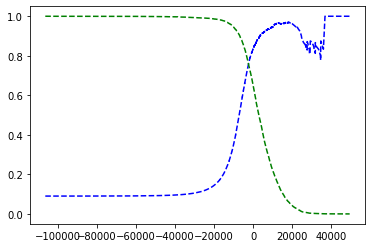

In [62]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label ='정밀도')
    plt.plot(thresholds, recalls[:-1], 'g--', label = '재현율')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

목표 : 정밀도 90%를 달성하는 것  
위 그래프에서 임곗값이 약 4,000 정도라는 것을 알 수 있다.  
조금 더 정확하게 최소한 90% 정밀도가 되는 가장 낮은 임곗값을 찾을 수 있다.

In [64]:
threshold_90_precision = thresholds[np.argmax(precisions > 0.90)]  #~3370
threshold_90_precision

3370.019499143958

###3.3.5 ROC 곡선

민감도(재현율)에 대한 1 - 특이도 그래프 , 거짓 양성 비율에 대한 진짜 양성 비율


*   특이도(TNR) : 음성으로 정확하게 분류한 음성 샘플의 비율인 진짜 음성 비율
*   민감도(TPR) : 진짜 양성 비율
*   FPR : 거짓양성 비율  
FPR = 1 - TNR





In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

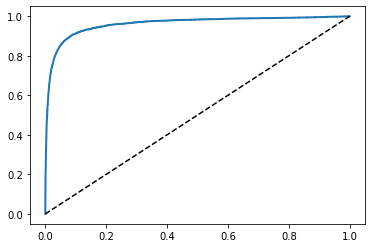

In [66]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1],[0,1],'k--') #대각 점선

plot_roc_curve(fpr,tpr)
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

RandomForestClassifier 를 훈련시켜 SGDClassifier 의 ROC 곡선과 ROC AUC 점수를 비교해보자.  
RandomForestClassifier 에는 decision_function() 메서드가 없고 대신 predict_proba() 메서드가 있다.

*   predict_proba() : 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환한다.


In [69]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3 , method = 'predict_proba')

In [75]:
y_probas_forest.shape

(59999, 2)

In [77]:
y_scores_forest = y_probas_forest[:,1]  #양성 클래스에 대한 확률을 점수로 사용합니다.
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

ValueError: ignored

NameError: ignored

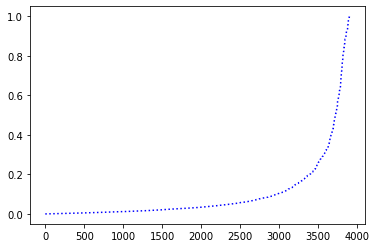

In [78]:
plt.plot(fpr,"b:",label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'랜덤 포레스트')
plt.legend(loc='lower right')
plt.show()

##3.6 다중 레이블 분류

분류기가 샘플마다 여러 개의 클래스를 출력해야 한다면?  
Ex) 얼굴 인식 분류기

In [79]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [80]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

각 숫자 이미지에 두 개의 타깃 레이블이 담긴 y_multilabel 배열을 만든다.  
첫번째는 숫자가 큰 값(7,8,9) 인지 나타내고 두 번째는 홀수인지 나타낸다.

In [81]:
knn_clf.predict([some_digit])


NameError: ignored

숫자 5는 크지 않고(False) 홀수(True) 입니다.

다중 레이블 분류기를 평가하는 방법  
Ex) 각 레이블의 F1 점수를 구하고 간단하게 평균 점수를 계산한다.  
다음 코드는 모든 레이블에 대한 F1 점수의 평균을 계산한다.

In [82]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

0.976410265560605

실제로는 아닐 수 있지만 이 코드는 모든 레이블의 가중치가 같다고 가정한 것이다. 특히 앨리스 사진이 밥이나 찰리 사진보다 훨씬 많다면 앨리스 사진에 대한 분류기의 점수에 더 높은 가중치를 둘 것이다. 간단한 방법은 레이블에 클래스의 지지도(즉, 타깃 레이블에 속한 샘플 수)를 가중치로 주는 것이다. 이렇게 하려면 이전 코드에서 average = 'weighted' 로 설정하면 된다.